<a href="https://colab.research.google.com/github/Daivar/Deep_Learning_Models/blob/main/Time_series_FTT_AR_MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

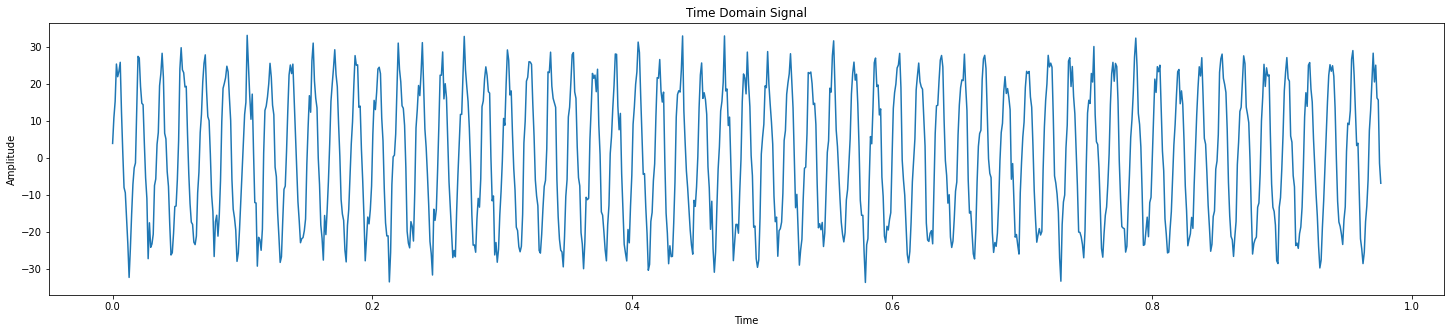

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import pi
from scipy.fftpack import fft

sample_rate = 1024 # samples
N = 2 * sample_rate # sample size
time = np.linspace(0, 2, N) # starting value, ending value, size

freq1 = 60 # Hz of vibration
magnitude1 = 25

freq2 = 215 # Hz of vibration
magnitude2 = 3

waveform1 = magnitude1 * np.sin(2 * pi * freq1 * time)
waveform2 = magnitude2 * np.sin(2 * pi * freq2 * time)

random_noise = np.random.normal(0, 3, N)
time_data = waveform1 + waveform2 + random_noise

plt.figure(figsize=(25,5))
plt.plot(time[0:1000], time_data[0:1000])
plt.title('Time Domain Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
frequency = np.linspace(0.0, 512, np.int(N/2))

freq_data = fft(time_data)
y = 2/N * np.abs(freq_data[0:np.int(N/2)])

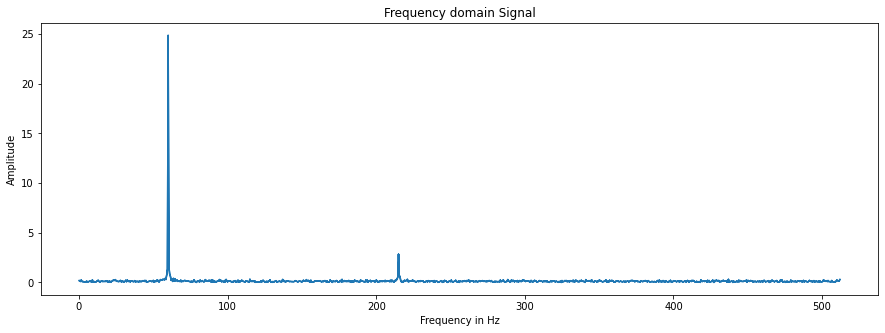

In [ ]:
import scipy
from scipy import fftpack
import pandas as pd
sig_noise_fft = scipy.fftpack.fft(time_data)
sig_noise_amp = 2/N * np.abs(sig_noise_fft)
sig_noise_freq = np.abs(scipy.fftpack.fftfreq(time_data.size, 2/2048)) # (the granularity in time domain divided by the total number of samples)

plt.figure(figsize=(15,5))
plt.plot(sig_noise_freq, sig_noise_amp)
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# Calculating the Amplitude
signal_amplitude = pd.Series(sig_noise_amp[0:np.int(sig_noise_amp.size/2)]).nlargest(2).round(0).astype(int).tolist()
print(signal_amplitude)

[25, 3]


In [ ]:
#Calculate Frequency Magnitude
magnitudes = abs(sig_noise_fft[np.where(sig_noise_freq[0:np.int(sig_noise_freq.size/2)] >= 0)])

#Get index of top 2 frequencies
peak_frequency = np.sort((np.argpartition(magnitudes, -2)[-2:])/2)
print(peak_frequency)

[ 60. 215.]


In [ ]:
from scipy.signal import butter, filtfilt

# Filter requirements.
fs = 215.0 # sample rate, Hz
cutoff = peak_frequency[0]  # desired cutoff frequency of the filter, Hz slightly higher than actual 2 Hz
order = 2 # sin wave can be approx represented as quadratic
def butter_lowpass_filter(data, cutoff, fs, order):
    print("Cutoff freq " + str(cutoff))
    nyq = 0.5 * fs # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter the data, and plot filtered signals.
y = butter_lowpass_filter(time_data, cutoff, fs, order)
y.shape

Cutoff freq 60.0


(2048,)

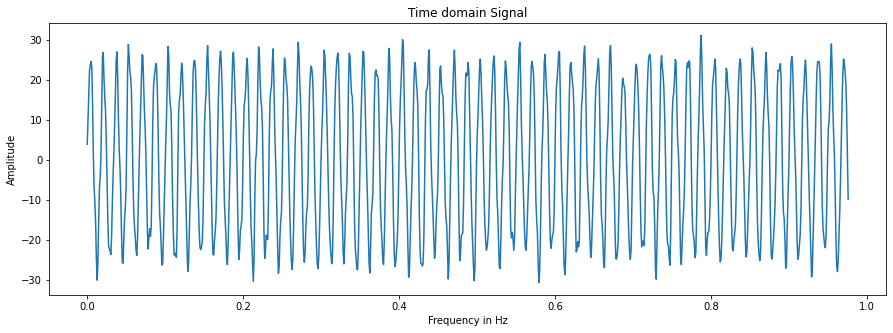

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(time[0:1000], y[0:1000])
plt.title('Time domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.show()

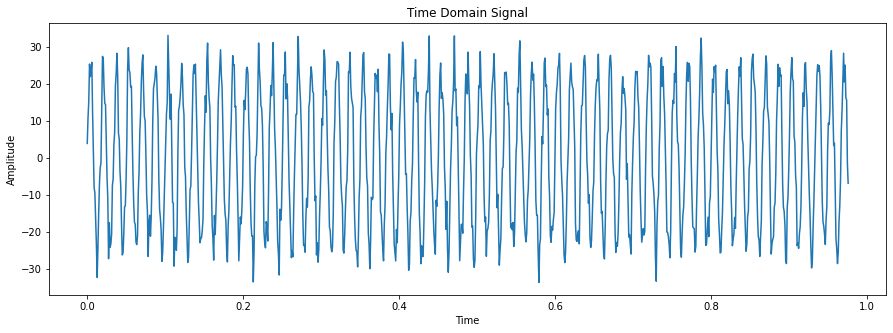

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(time[0:1000], time_data[0:1000])
plt.title('Time Domain Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

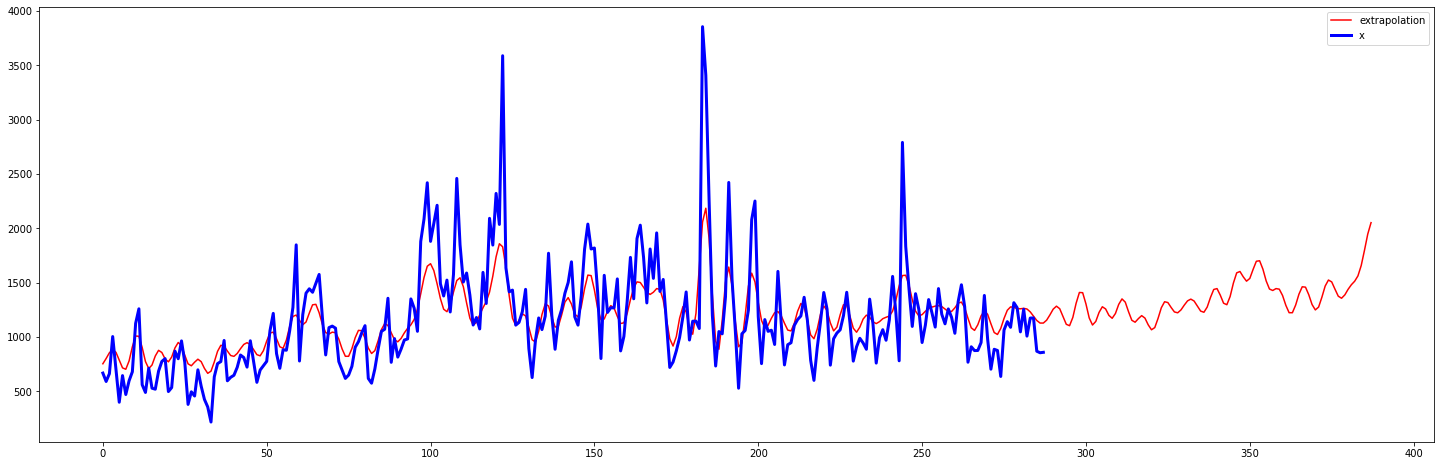

In [ ]:
# Forecasting with FFT

import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_harmonics, n_predict):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = range(n)
    # sort indexes by frequency, lower -> higher
    sorted(indexes, key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harmonics * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    

x = np.array([
      669, 592, 664, 1005, 699, 401, 646, 472, 598, 681, 1126, 
      1260, 562, 491, 714, 530, 521, 687, 776, 802, 499, 536, 
      871, 801, 965, 768, 381, 497, 458, 699, 549, 427, 358, 
      219, 635, 756, 775, 969, 598, 630, 649, 722, 835, 812, 
      724, 966, 778, 584, 697, 737, 777, 1059, 1218, 848, 
      713, 884, 879, 1056, 1273, 1848, 780, 1206, 1404, 
      1444, 1412, 1493, 1576, 1178, 836, 1087, 1101, 
      1082, 775, 698, 620, 651, 731, 906, 958, 1039, 
      1105, 620, 576, 707, 888, 1052, 1072, 1357, 
      768, 986, 816, 889, 973, 983, 1351, 1266, 
      1053, 1879, 2085, 2419, 1880, 2045, 2212, 
      1491, 1378, 1524, 1231, 1577, 2459, 1848, 
      1506, 1589, 1386, 1111, 1180, 1075, 1595, 
      1309, 2092, 1846, 2321, 2036, 3587, 1637, 
      1416, 1432, 1110, 1135, 1233, 1439, 894, 
      628, 967, 1176, 1069, 1193, 1771, 1199, 
      888, 1155, 1254, 1403, 1502, 1692, 1187, 
      1110, 1382, 1808, 2039, 1810, 1819, 1408, 
      803, 1568, 1227, 1270, 1268, 1535, 873, 
      1006, 1328, 1733, 1352, 1906, 2029, 1734, 
      1314, 1810, 1540, 1958, 1420, 1530, 1126,
      721, 771, 874, 997, 1186, 1415, 973, 1146, 
      1147, 1079, 3854, 3407, 2257, 1200, 734, 
      1051, 1030, 1370, 2422, 1531, 1062, 530, 
      1030, 1061, 1249, 2080, 2251, 1190, 756, 
      1161, 1053, 1063, 932, 1604, 1130, 744, 
      930, 948, 1107, 1161, 1194, 1366, 1155, 
      785, 602, 903, 1142, 1410, 1256, 742, 
      985, 1037, 1067, 1196, 1412, 1127, 
      779, 911, 989, 946, 888, 1349, 1124, 
      761, 994, 1068, 971, 1157, 1558, 1223, 
      782, 2790, 1835, 1444, 1098, 1399, 1255,
      950, 1110, 1345, 1224, 1092, 1446, 1210, 
      1122, 1259, 1181, 1035, 1325, 1481, 1278, 
      769, 911, 876, 877, 950, 1383, 980, 705, 
      888, 877, 638, 1065, 1142, 1090, 1316, 
      1270, 1048, 1256, 1009, 1175, 1176, 870, 856, 860])

extrapolation = fourierExtrapolation(x, n_harmonics=25, n_predict=100)
pl.figure(figsize=(25,8))
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
pl.legend()
pl.show()

[0.44228341]


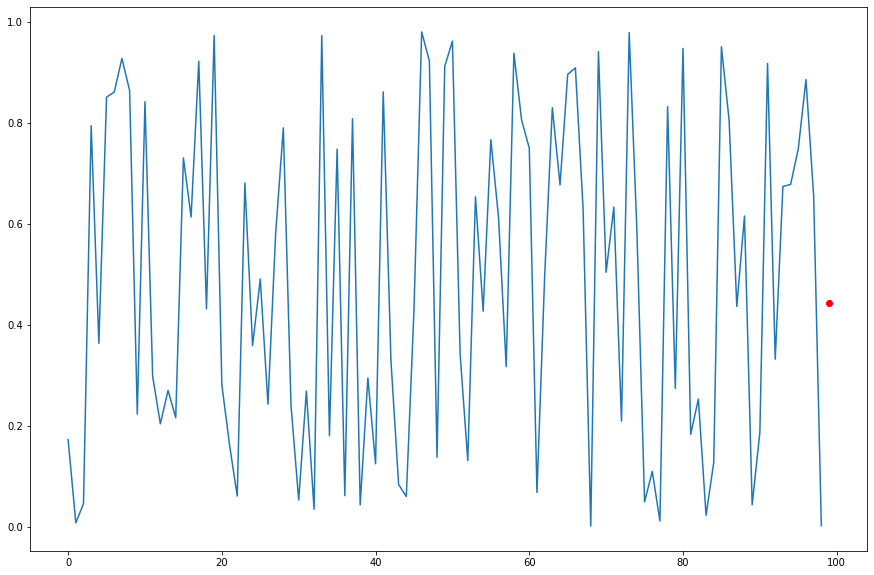

In [ ]:
# ARMA model

from statsmodels.tsa.arima_model import ARMA
from random import random
import matplotlib.pyplot as plt

# contrived dataset
data = [random() for x in range(1, 100)]

# fit model
model = ARMA(data, order=(2, 1)) # p, q
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

plt.figure(figsize=(15,10))
plt.plot(data)
plt.plot(len(data), yhat, 'or')

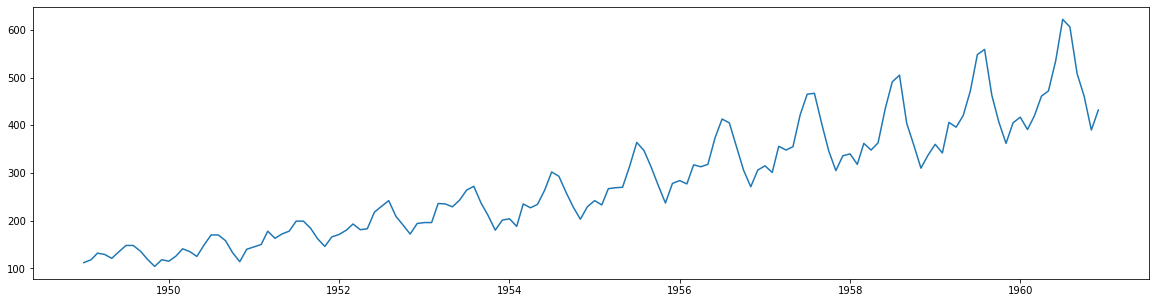

In [ ]:
# ARIMA model

# Works well with small data. Data can have a trend, so does not need to be strictly stationary. ARIMA model applies differencing to make it more stationary is performs it's job.

femb = 'https://raw.githubusercontent.com/MindaugasBernatavicius/DeepLearningCourse/master/09_Sequential_Data_Analysis/daily-total-female-births.csv'
airp = 'https://raw.githubusercontent.com/MindaugasBernatavicius/DeepLearningCourse/master/09_Sequential_Data_Analysis/airline-passengers.csv'

import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

df = pd.read_csv(airp, parse_dates=['Month'], index_col=['Month'])
plt.figure(figsize=(20,5))
plt.plot(df)
plt.show()

In [ ]:
def test_stationarity(timeseries):
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    plt.figure(figsize=(20,5))
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Passengers'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

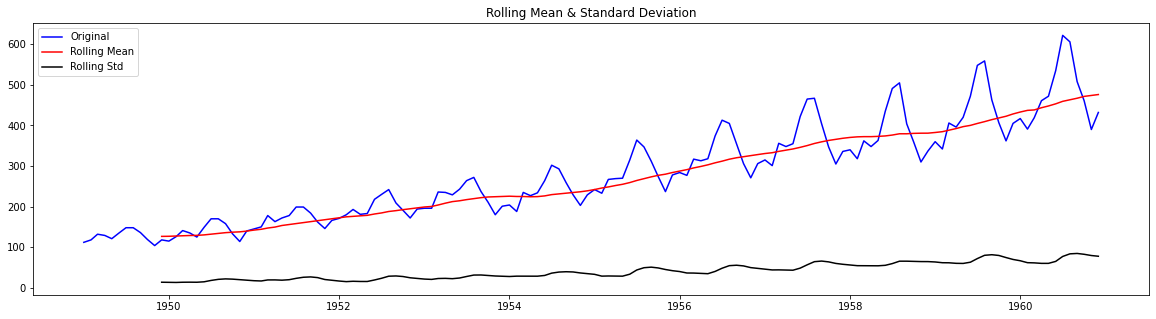

ADF Statistic: 0.8153688792060418
p-value: 0.9918802434376409
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


In [ ]:
test_stationarity(df)

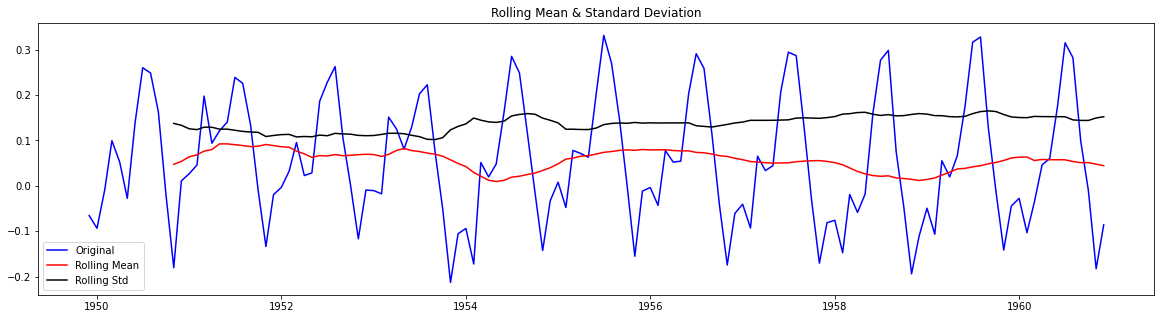

ADF Statistic: -3.1629079913008504
p-value: 0.022234630001244333
Critical Values:
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


In [ ]:
df_log = np.log(df)
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)

test_stationarity(df_log_minus_mean)

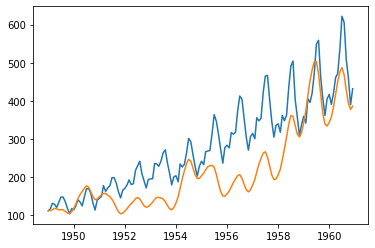

In [ ]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Passengers'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

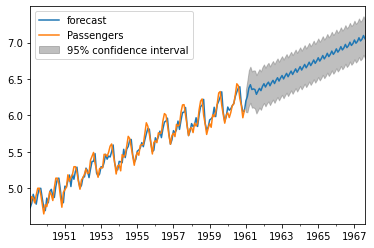

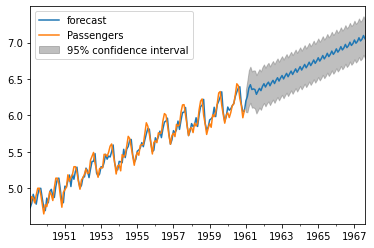

In [ ]:
number_of_prediction = 80
results.plot_predict(1,len(results.fittedvalues) + number_of_prediction) # 264

In [29]:
!pip3 install pmdarima

In [23]:
!pip3 install arch

     |████████████████████████████████| 902 kB 5.0 MB/s 


In [25]:
import matplotlib.pyplot as plt
import pandas_datareader.data as web
# collect data for Amazon from 2017-04-22 to 2018-04-22
start = '2015-04-22'
end = '2020-11-24'
df = web.DataReader(name='GOOGL', data_source='stooq', start=start, end=end)
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-24,1727.50,1766.4750,1720.7300,1763.90,1400306
2020-11-23,1740.22,1745.9900,1710.1800,1727.56,1127618
2020-11-20,1762.00,1768.3625,1735.0000,1736.38,1385322
2020-11-19,1733.23,1763.4900,1730.0200,1758.57,1005340
2020-11-18,1756.64,1765.0000,1738.5658,1740.64,1005377
...,...,...,...,...,...
2015-04-28,564.32,567.8300,560.9600,564.37,1859787
2015-04-27,572.45,575.5200,562.3000,566.12,2403100
2015-04-24,580.05,584.7000,568.3500,573.66,4608403


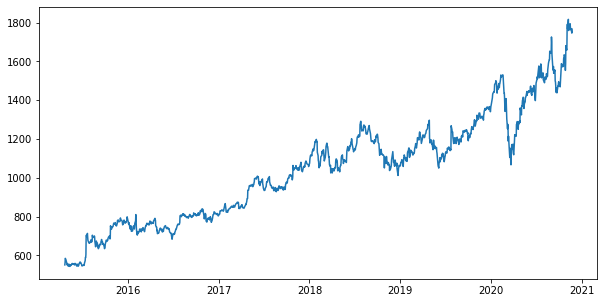

In [26]:
plt.figure(figsize=(10,5))
plt.plot(df['High'])

In [27]:
# load statsmodels
import statsmodels.tsa.arima_model as stm
# fit ARIMA model
model = stm.ARIMA(df['High'], order=(3,1,2))
model_fit = model.fit()
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
forecast

array([550.27111628])